In [4]:
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

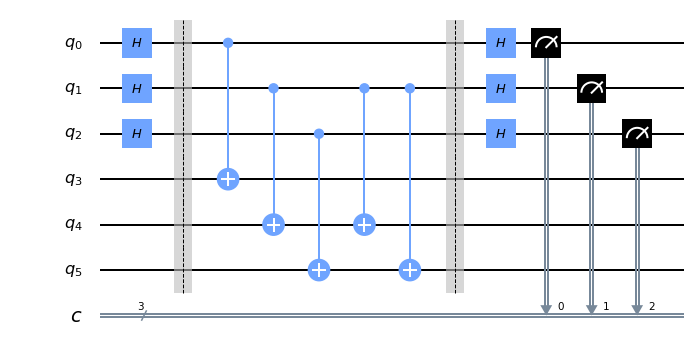

In [5]:
b = '110'

n = len(b)
simon_circuit = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit.h(range(n))    
    
# Apply barrier for visual separation
simon_circuit.barrier()

simon_circuit += simon_oracle(b)

# Apply barrier for visual separation
simon_circuit.barrier()

# Apply Hadamard gates to the input register
simon_circuit.h(range(n))

# Measure qubits
simon_circuit.measure(range(n), range(n))
simon_circuit.draw()

In [6]:
backend = BasicAer.get_backend('statevector_simulator')
shots = 2048
results = execute(simon_circuit, backend=backend, shots=shots).result()
counts = results.get_statevector()
print(counts)

[ 0. +0.0000000e+00j  0.5-6.1232340e-17j  0. +0.0000000e+00j
  0. +0.0000000e+00j  0. +0.0000000e+00j  0. +0.0000000e+00j
  0. +0.0000000e+00j  0. +0.0000000e+00j  0. +0.0000000e+00j
 -0.5+1.2246468e-16j  0. +0.0000000e+00j  0. +0.0000000e+00j
  0. +0.0000000e+00j  0. +0.0000000e+00j  0. +0.0000000e+00j
  0. +0.0000000e+00j  0. +0.0000000e+00j  0. +0.0000000e+00j
  0. +0.0000000e+00j  0. +0.0000000e+00j  0. +0.0000000e+00j
  0. +0.0000000e+00j  0. +0.0000000e+00j  0. +0.0000000e+00j
  0. +0.0000000e+00j  0. +0.0000000e+00j  0. +0.0000000e+00j
  0. +0.0000000e+00j  0. +0.0000000e+00j  0. +0.0000000e+00j
  0. +0.0000000e+00j  0. +0.0000000e+00j  0. +0.0000000e+00j
  0.5-6.1232340e-17j  0. +0.0000000e+00j  0. +0.0000000e+00j
  0. +0.0000000e+00j  0. +0.0000000e+00j  0. +0.0000000e+00j
  0. +0.0000000e+00j  0. +0.0000000e+00j -0.5+1.2246468e-16j
  0. +0.0000000e+00j  0. +0.0000000e+00j  0. +0.0000000e+00j
  0. +0.0000000e+00j  0. +0.0000000e+00j  0. +0.0000000e+00j
  0. +0.0000000e+00j  0.

In [9]:
print(counts)

{'111': 513, '001': 481, '110': 536, '000': 518}


In [7]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )

110.111 = 0 (mod 2)
110.001 = 0 (mod 2)
110.110 = 0 (mod 2)
110.000 = 0 (mod 2)
